In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import io


In [ ]:
# Upload the file
uploaded = files.upload()

# Get the filename and file content from the dictionary
filename = list(uploaded.keys())[0]
file_content = uploaded[filename]

# Create a DataFrame from the file content
df = pd.read_csv(io.BytesIO(file_content)) # Assuming it's a CSV file

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

Saving cancer patient data sets.csv to cancer patient data sets (2).csv
   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3 

In [ ]:
# Preprocess: Drop non-numeric columns (if any) and scale data
numeric_data = df.select_dtypes(include=['float64', 'int64']) # Changed 'data' to 'df'
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [ ]:
# Generate linkage matrix
linkage_matrix = linkage(scaled_data, method='ward')

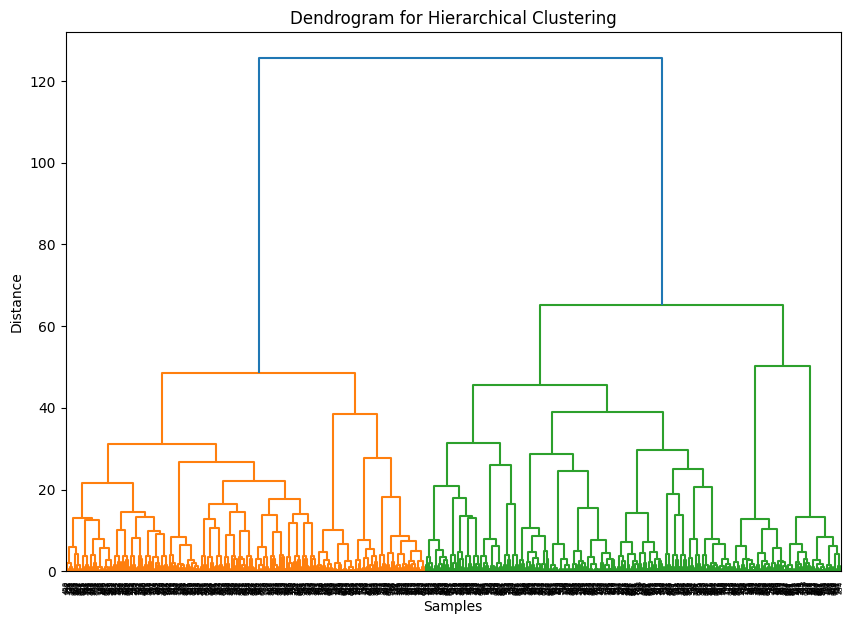

In [ ]:
# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Perform hierarchical clustering
hierarchical_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_clusters = hierarchical_model.fit_predict(scaled_data)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Perform K-Means clustering
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans_model.fit_predict(scaled_data)


In [ ]:
# Display cluster centers and inertia
print("K-Means Cluster Centers:\n", kmeans_model.cluster_centers_)
print("K-Means Inertia:", kmeans_model.inertia_)

K-Means Cluster Centers:
 [[-0.03756411 -0.11993582  0.21133503 -0.7272921  -1.01287492 -0.94029173
  -0.98004892 -0.97786448 -0.83448992 -0.84593145 -0.81569263 -0.54576043
  -0.65625108 -0.80844165 -0.76697091 -0.41059555 -0.3071819  -0.61179407
  -0.16710521  0.13866895 -0.48838209 -0.29018887 -0.42406353 -0.0671894 ]
 [ 0.01915418 -0.03072353 -0.28145921  0.73322737  0.88768712  0.79215069
   0.93667134  0.96522232  0.95908567  1.03929493  0.859599    1.01176376
   1.06161881  1.14520441  0.92620419  0.27813762 -0.17487045  0.0642164
   0.13278458  0.22826951 -0.01689812  0.03348648  0.04988583  0.21846083]
 [ 0.05296229  0.36051537  0.0639062   0.27047067  0.65470372  0.67429618
   0.4715001   0.40661846  0.06494937 -0.07386724  0.22574218 -0.75860013
  -0.58930736 -0.38719512 -0.03346954  0.43563008  1.12373537  1.37870672
   0.13648666 -0.81838193  1.24259345  0.64764789  0.94445047 -0.28901961]]
K-Means Inertia: 13800.437931510043


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# Calculate silhouette scores
hierarchical_silhouette = silhouette_score(scaled_data, hierarchical_clusters)
kmeans_silhouette = silhouette_score(scaled_data, kmeans_clusters)

In [ ]:
print("Hierarchical Clustering Silhouette Score:", hierarchical_silhouette)
print("K-Means Clustering Silhouette Score:", kmeans_silhouette)

Hierarchical Clustering Silhouette Score: 0.28701594004930275
K-Means Clustering Silhouette Score: 0.29141924076086523


Text(0.5, 1.0, 'Hierarchical Clustering')

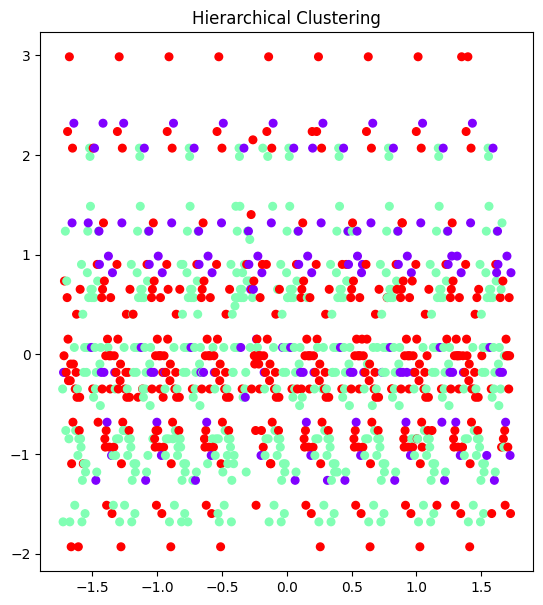

In [ ]:
# Visualize Clusters
plt.figure(figsize=(14, 7))

# Hierarchical Clustering
plt.subplot(1, 2, 1)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=hierarchical_clusters, cmap='rainbow', s=30)
plt.title("Hierarchical Clustering")

Text(0.5, 1.0, 'K-Means Clustering')

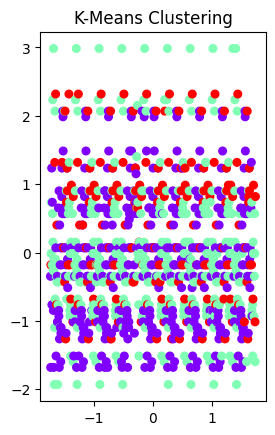

In [ ]:
# K-Means Clustering
plt.subplot(1, 2, 2)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_clusters, cmap='rainbow', s=30)
plt.title("K-Means Clustering")
